In [12]:
"""
Script to Explore Training Dataset
"""
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re
import matplotlib
from matplotlib import patches
import sys, os
SCRIPT_DIR = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.dirname(os.path.dirname(SCRIPT_DIR))) 
from analysis.utils import utils
import dataframe_image as dfi
from PIL import Image
from collections import defaultdict
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
font = {'family' : 'Ubuntu',
        'size'   : 22}
matplotlib.rc('font', **font)
import json
from datetime import datetime
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# ACTION_PERIOD = ['grab something', ]
tagId = "0x683f"
regions_fp = Path().joinpath("04_outputs", "REGIONS", "2023-03-14 12:15:31.794149.json")
data_fp = Path().joinpath("04_outputs", "TRAINING", "2023-04-03 11:53:01.922254_W2_S1_wild_training.csv")
wild_fp = Path().joinpath("04_outputs", "TRAINING", "2023-04-03 12:02:19.920324_W2_S1_training.csv")
mylocation = Path().joinpath("04_outputs", "location_encoder.joblib")
data = pd.read_csv(data_fp) 
wild_data = pd.read_csv(wild_fp)
# Include wild in training?
data = pd.concat([data, wild_data], axis=0)

In [13]:
# MARK: - Preprocessing
# data.loc[data.loc[:, 'ACTIVITY'] != "ASSEMBLESANDWICH", :].groupby('ACTIVITY').count()

cleaned_data = (data
                .loc[data.loc[:, 'ACTIVITY'] != "ASSEMBLESANDWICH", :] # Removes assemblesandiwch activity
                .dropna()
                .reset_index(drop=True)
                .pipe(utils.one_hot_encode_col, 'LOCATION', '')
            )

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(cleaned_data['ACTIVITY'].values)
cleaned_data['ACTIVITY'] = encoded_y


joblib.dump(label_encoder, 'label_encoder.joblib')
display(cleaned_data)
categories = label_encoder.classes_
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

,MEAN_POS_X,MEAN_POS_Y,MEAN_POS_Z,MEAN_ACC_X,MEAN_ACC_Y,MEAN_ACC_Z,MEAN_LINACC_X,MEAN_LINACC_Y,MEAN_LINACC_Z,MEAN_GYRO_X,...,LOCATION_Bedroom,LOCATION_FrontEntrance,LOCATION_Hallway,LOCATION_Kitchen,LOCATION_LivingRoom,LOCATION_counter,LOCATION_dish_cabinet,LOCATION_fridge,LOCATION_kitchen_sink,LOCATION_undefined
0,9568.571667,2892.512473,316.314930,-766.233333,-276.333333,-221.966667,140.066667,-111.966667,44.400000,-5.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9700.121667,2942.553254,466.931526,-760.066667,-327.633333,-133.733333,155.133333,-71.800000,-2.933333,-0.450000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9858.968966,3040.129439,572.112752,-812.862069,-307.068966,-207.896552,53.758621,-76.931034,-136.689655,-6.161638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9720.485000,2974.857006,404.658117,-910.533333,-309.666667,-96.666667,28.300000,-162.400000,-22.900000,-4.739583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9679.286667,2894.386471,461.408154,-895.366667,-281.900000,10.266667,67.766667,-132.466667,-16.700000,-3.779167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,9495.598387,2979.687683,641.823659,-709.451613,-456.096774,294.451613,32.548387,-121.483871,-42.000000,21.657258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5737,9174.979032,2793.747801,880.549066,-711.806452,83.161290,245.322581,-5.838710,-66.709677,-72.419355,-5.366935,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5738,9258.122581,2853.839709,1314.616815,-674.967742,475.483871,13.161290,59.548387,-21.774194,-155.129032,-21.173387,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5739,9522.843548,3054.187070,1889.700948,-606.354839,279.387097,112.032258,70.774194,29.645161,-156.322581,5.463710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


{'BRUSHTEETH': 0, 'GETPLATE': 1, 'MINCE': 2, 'MOP': 3, 'OPENFREEZER': 4, 'OPENFRIDGE': 5, 'SLICETOMATO': 6, 'TIESHOES': 7, 'UNDEFINED': 8, 'WASHHANDS': 9}


Data Shape:  (5741, 108) (5741,)
Train Shape:  (4592, 108) (4592,)
Test Shape:  (1149, 108) (1149,)


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

0.9704090513489991


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

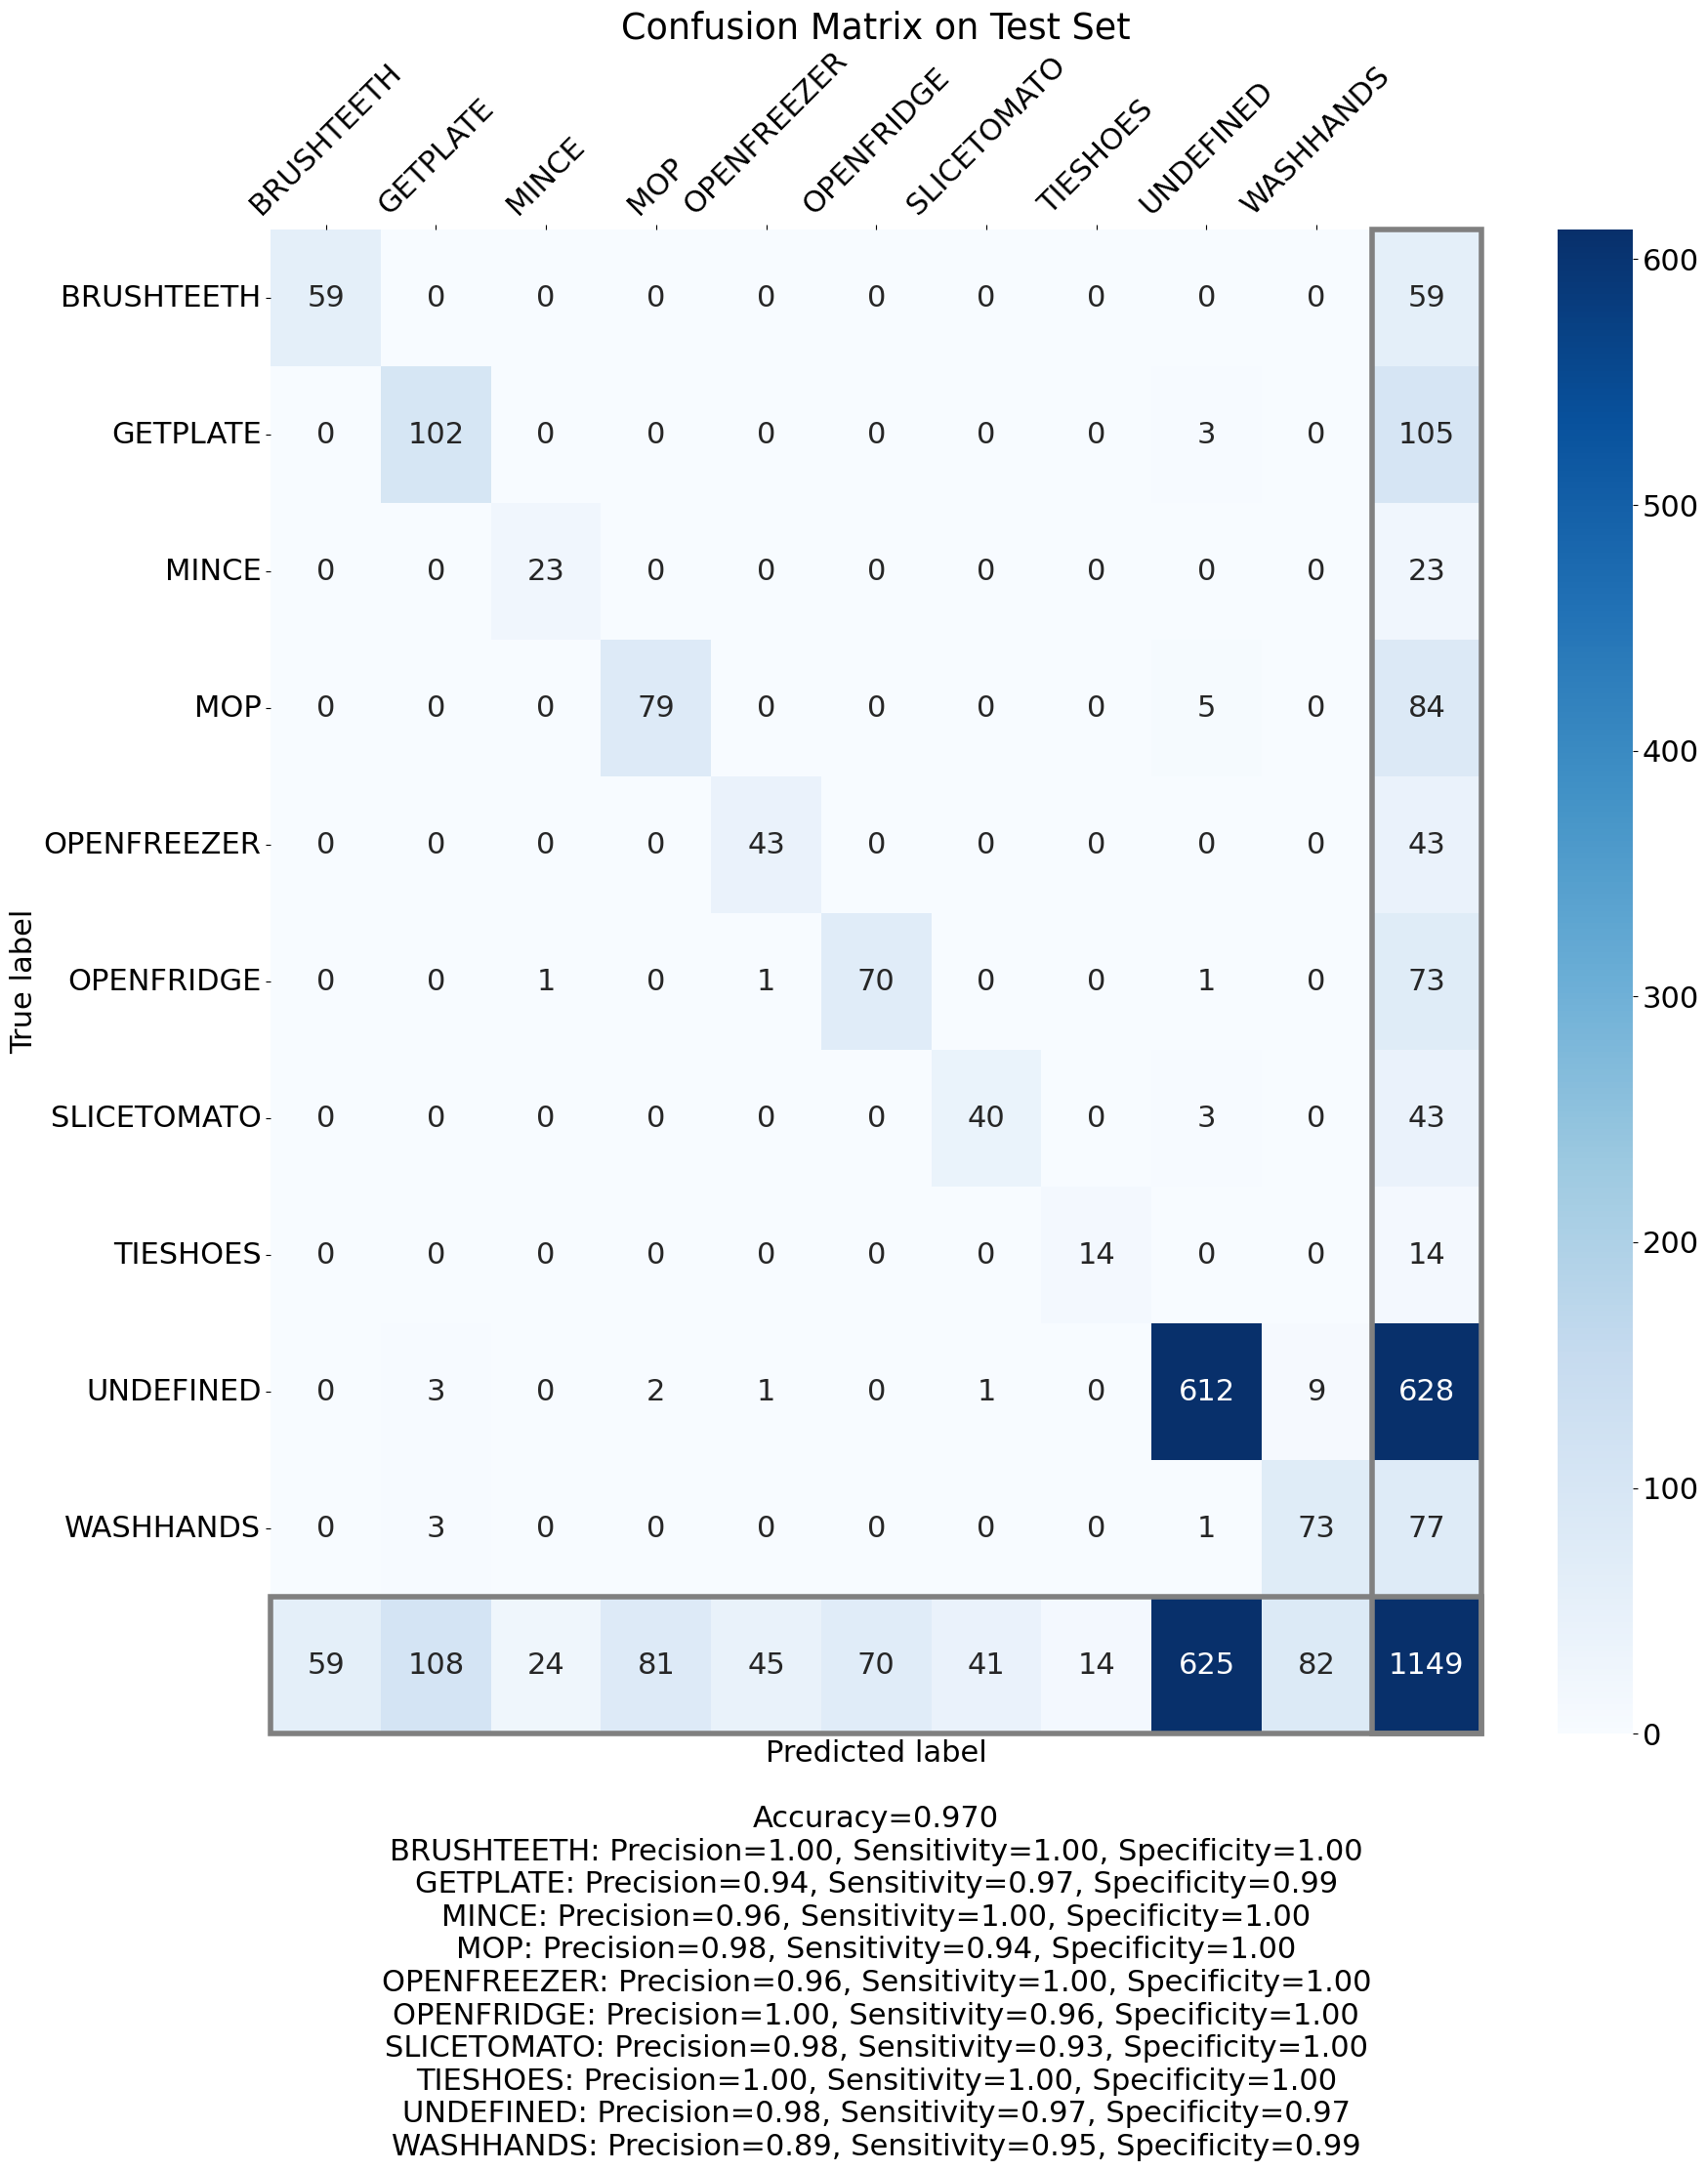

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

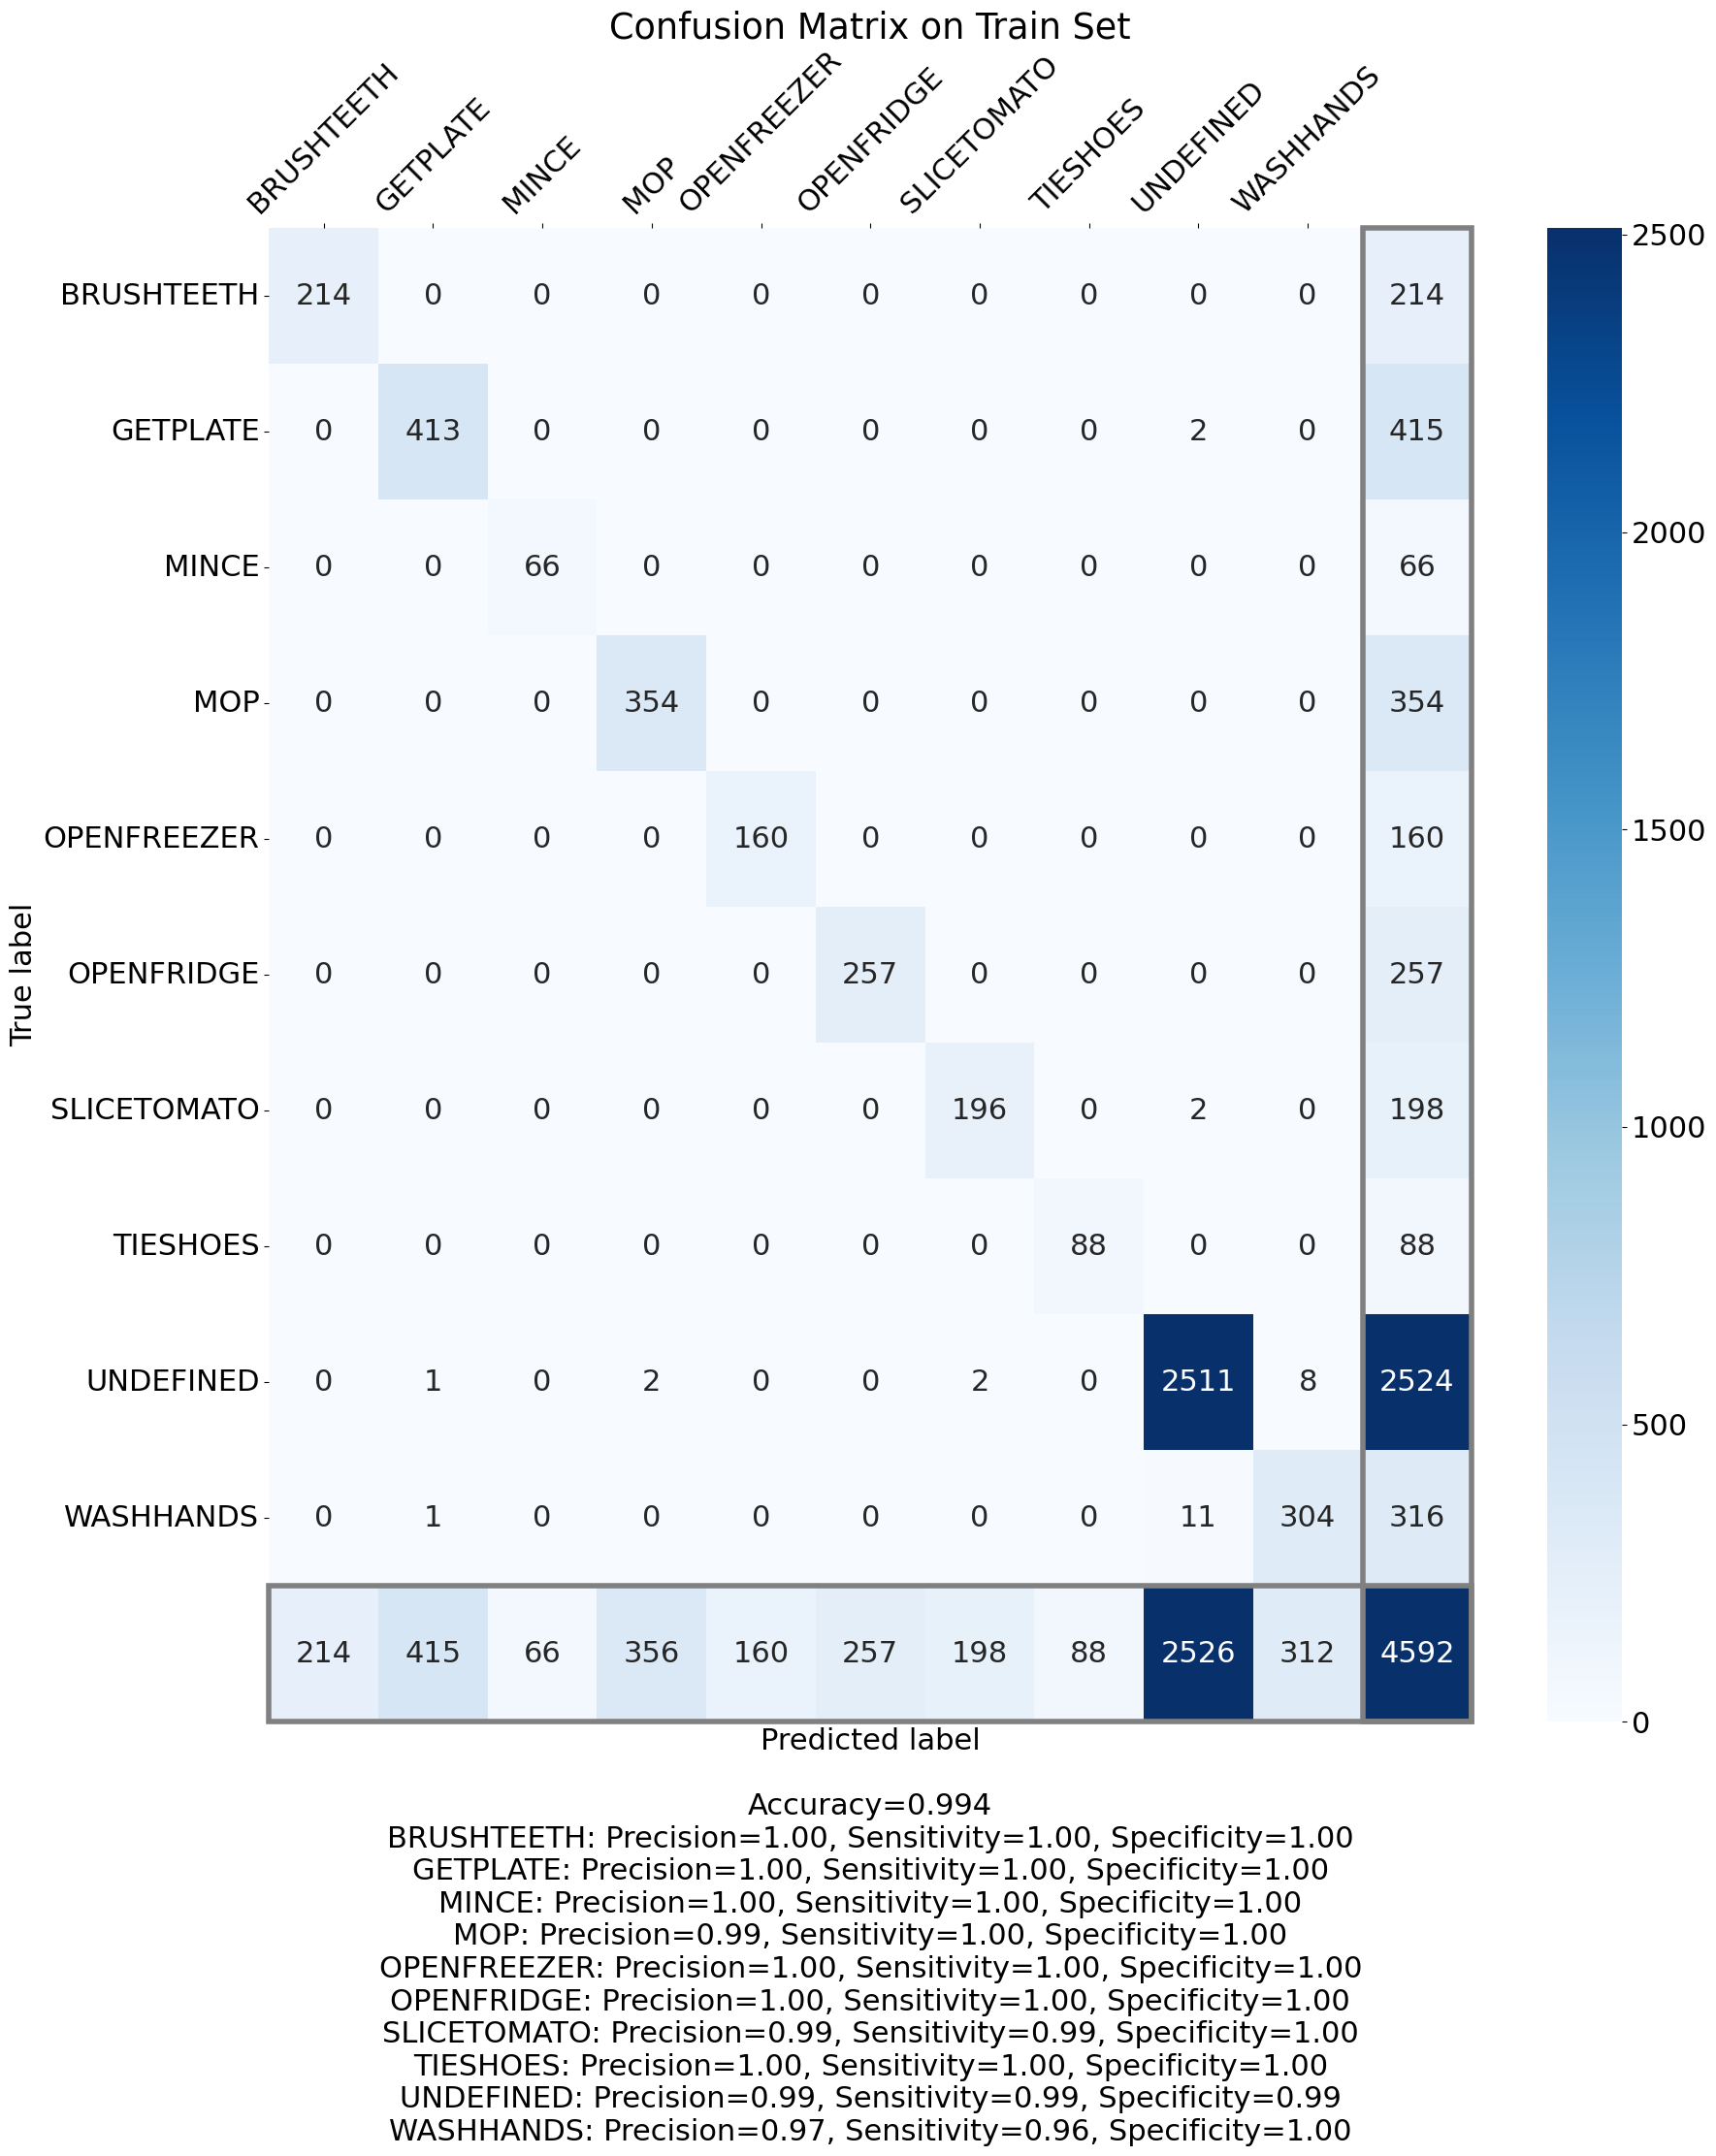

In [14]:
# MARK: - Training
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm, tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = cleaned_data.drop('ACTIVITY', axis=1).values
y = cleaned_data.loc[:, 'ACTIVITY'].values

print("Data Shape: ", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print("Train Shape: ", X_train.shape, y_train.shape)
print("Test Shape: ", X_test.shape, y_test.shape)


##################################################
#               MODEL SELECTION

clf = svm.SVC(kernel='linear', C=10) # SVM
# clf = tree.DecisionTreeClassifier(random_state=0) # Decision Tree
##################################################

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Test Set")

y_pred = clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Train Set")


# # Plot the tree *** Only for the tree classifier
# plt.figure(figsize=(100,100))
# tree.plot_tree(clf, class_names=categories, feature_names=cleaned_data.drop('ACTIVITY', axis=1).columns)


In [15]:
# Cross Validation
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score, accuracy_score

# k = 5
# kf = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
# cross_clf = svm.SVC(kernel='linear', C=10)

# accuracy = []

# for train_ind, test_ind in kf.split(X, y):
#     X_train, X_test = X[train_ind], X[test_ind]
#     y_train, y_test = y[train_ind], y[test_ind]

#     print("Shape X_train: ", X_train.shape, " Shape X_test: ", X_test.shape)
#     cross_clf.fit(X_train, y_train)
#     y_pred = cross_clf.predict(X_test)

#     accuracy.append(accuracy_score(y_pred, y_test))

# print(accuracy)



In [16]:
# Test on Wild Data
cleaned_wild = (wild_data
                .dropna()
                .reset_index(drop=True)
                .pipe(utils.one_hot_encode_col, 'LOCATION', mylocation)
            )
encoded_y = label_encoder.transform(cleaned_wild['ACTIVITY'].values)
cleaned_wild['ACTIVITY'] = encoded_y

X_wild = cleaned_wild.drop('ACTIVITY', axis=1).values
y_wild = cleaned_wild.loc[:, 'ACTIVITY'].values

y_pred = clf.predict(X_wild)
cf_matrix = confusion_matrix(y_wild, y_pred, labels=label_encoder.transform(label_encoder.classes_)) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Wild Set")

ValueError: y contains previously unseen labels: 'ASSEMBLESANDWICH'

In [17]:
# Export the model
import joblib

joblib.dump(clf, 'output_model.joblib')

['output_model.joblib']